In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-90.000,90.000,size=1500)
lats_lngs= zip(lats,lngs)
lats_lngs

In [3]:
#add the lats and lngs to a list
coordinates=list(lats_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities=[]
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique add to the list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
        


590

In [6]:
# Import the requests library
import requests
#Import the API Key
from config import weather_api_key

In [21]:
# Starting the URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime


In [9]:
# Creat an empty list to hold the weather data
city_data=[]
#print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")
#create counters
record_count=1
set_count=1


Beginning Data Retrieval   
---------------------------


In [14]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
    #Create endpoint URL with each city
    
    city_url= url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count+=1
#Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity= city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the data to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    #Indicate the Data Loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
    

Processing Record 1 of Set 23 | qaanaaq
Processing Record 2 of Set 23 | lekoni
Processing Record 3 of Set 23 | caarapo
Processing Record 4 of Set 23 | harindanga
Processing Record 5 of Set 23 | venado tuerto
Processing Record 6 of Set 23 | bredasdorp
Processing Record 7 of Set 23 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 23 | ferrol
Processing Record 9 of Set 23 | grindavik
Processing Record 10 of Set 23 | awjilah
Processing Record 11 of Set 23 | bolungarvik
City not found. Skipping...
Processing Record 12 of Set 23 | dickson
Processing Record 13 of Set 23 | longyearbyen
Processing Record 14 of Set 23 | castro
Processing Record 15 of Set 23 | cape town
Processing Record 16 of Set 23 | punta arenas
Processing Record 17 of Set 23 | chuy
Processing Record 18 of Set 23 | muros
Processing Record 19 of Set 23 | mar del plata
Processing Record 20 of Set 23 | jamestown
Processing Record 21 of Set 23 | ouango
Processing Record 22 of Set 23 | kamenka
Processing Record 23

Processing Record 33 of Set 26 | esna
Processing Record 34 of Set 26 | umm lajj
Processing Record 35 of Set 26 | inhambane
Processing Record 36 of Set 26 | nuuk
Processing Record 37 of Set 26 | adrar
Processing Record 38 of Set 26 | orocue
Processing Record 39 of Set 26 | puerto leguizamo
Processing Record 40 of Set 26 | toliary
City not found. Skipping...
Processing Record 41 of Set 26 | amapa
Processing Record 42 of Set 26 | mbaiki
Processing Record 43 of Set 26 | westport
Processing Record 44 of Set 26 | kayerkan
Processing Record 45 of Set 26 | almeirim
Processing Record 46 of Set 26 | aripuana
Processing Record 47 of Set 26 | vammala
Processing Record 48 of Set 26 | radeberg
Processing Record 49 of Set 26 | ust-koksa
Processing Record 50 of Set 26 | qax
Processing Record 1 of Set 27 | port hawkesbury
Processing Record 2 of Set 27 | baboua
City not found. Skipping...
Processing Record 3 of Set 27 | takoradi
Processing Record 4 of Set 27 | gravdal
Processing Record 5 of Set 27 | nan

Processing Record 14 of Set 30 | tekeli
Processing Record 15 of Set 30 | manaus
Processing Record 16 of Set 30 | dangriga
Processing Record 17 of Set 30 | parabel
Processing Record 18 of Set 30 | caimito
Processing Record 19 of Set 30 | casma
Processing Record 20 of Set 30 | maiduguri
Processing Record 21 of Set 30 | bonfim
Processing Record 22 of Set 30 | pembroke
Processing Record 23 of Set 30 | rundu
Processing Record 24 of Set 30 | brigantine
Processing Record 25 of Set 30 | eyl
Processing Record 26 of Set 30 | nawabganj
Processing Record 27 of Set 30 | san
Processing Record 28 of Set 30 | mangan
Processing Record 29 of Set 30 | biltine
Processing Record 30 of Set 30 | kaya
Processing Record 31 of Set 30 | akdepe
Processing Record 32 of Set 30 | kharp
Processing Record 33 of Set 30 | salekhard
Processing Record 34 of Set 30 | wilmington
Processing Record 35 of Set 30 | bichena
Processing Record 36 of Set 30 | barmer
Processing Record 37 of Set 30 | harstad
Processing Record 38 of S

City not found. Skipping...
Processing Record 5 of Set 34 | thunder bay
Processing Record 6 of Set 34 | humlebaek
Processing Record 7 of Set 34 | surman
Processing Record 8 of Set 34 | oswego
Processing Record 9 of Set 34 | camocim
Processing Record 10 of Set 34 | kapoeta
Processing Record 11 of Set 34 | moose factory
Processing Record 12 of Set 34 | mega
Processing Record 13 of Set 34 | bargal
City not found. Skipping...
Processing Record 14 of Set 34 | porto empedocle
Processing Record 15 of Set 34 | gao
Processing Record 16 of Set 34 | caxito
Processing Record 17 of Set 34 | grosseto
Processing Record 18 of Set 34 | port shepstone
Processing Record 19 of Set 34 | chekmagush
Processing Record 20 of Set 34 | porto novo
Processing Record 21 of Set 34 | yialos
City not found. Skipping...
Processing Record 22 of Set 34 | novoselytsya
Processing Record 23 of Set 34 | kuche
City not found. Skipping...
Processing Record 24 of Set 34 | santa quiteria
Processing Record 25 of Set 34 | muridke


In [15]:
len(city_data)

539

In [16]:
#Convert the city_data dictionary to a datafram
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,19.90,94,100,6.33,GL,2021-10-16 03:05:04
1,Lekoni,-1.5843,14.2591,71.19,93,100,3.15,GA,2021-10-16 03:05:05
2,Caarapo,-22.6342,-54.8222,67.44,96,100,4.52,BR,2021-10-16 03:04:01
3,Harindanga,22.0383,88.3214,85.98,75,99,5.55,IN,2021-10-16 03:05:07
4,Venado Tuerto,-33.7456,-61.9688,49.78,45,0,4.21,AR,2021-10-16 03:05:08
5,Bredasdorp,-34.5322,20.0403,50.29,73,55,12.86,ZA,2021-10-16 03:01:07
6,Ferrol,43.4832,-8.2369,56.35,76,100,3.20,ES,2021-10-16 03:05:11
7,Grindavik,63.8424,-22.4338,41.47,87,75,3.44,IS,2021-10-16 03:05:12
8,Awjilah,29.1081,21.2869,64.38,66,0,6.35,LY,2021-10-16 03:05:13
9,Dickson,36.0770,-87.3878,71.13,97,90,5.75,US,2021-10-16 03:05:14


In [17]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [19]:
#Add new column data to new and or overwrite the datatframe
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-10-16 03:05:04,77.4840,-69.3632,19.90,94,100,6.33
1,Lekoni,GA,2021-10-16 03:05:05,-1.5843,14.2591,71.19,93,100,3.15
2,Caarapo,BR,2021-10-16 03:04:01,-22.6342,-54.8222,67.44,96,100,4.52
3,Harindanga,IN,2021-10-16 03:05:07,22.0383,88.3214,85.98,75,99,5.55
4,Venado Tuerto,AR,2021-10-16 03:05:08,-33.7456,-61.9688,49.78,45,0,4.21
5,Bredasdorp,ZA,2021-10-16 03:01:07,-34.5322,20.0403,50.29,73,55,12.86
6,Ferrol,ES,2021-10-16 03:05:11,43.4832,-8.2369,56.35,76,100,3.20
7,Grindavik,IS,2021-10-16 03:05:12,63.8424,-22.4338,41.47,87,75,3.44
8,Awjilah,LY,2021-10-16 03:05:13,29.1081,21.2869,64.38,66,0,6.35
9,Dickson,US,2021-10-16 03:05:14,36.0770,-87.3878,71.13,97,90,5.75


In [20]:
#Create the output file(CSV)
output_data_file= "weather_data/cities.csv"
#export the city_data into a CSV"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
#Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

In [23]:
#Import the time module
import time

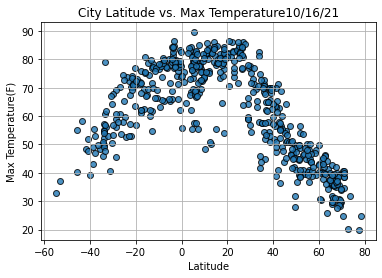

In [27]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,max_temps, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

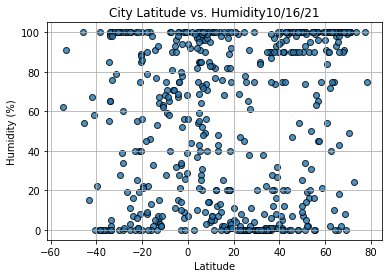

In [28]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,humidity, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

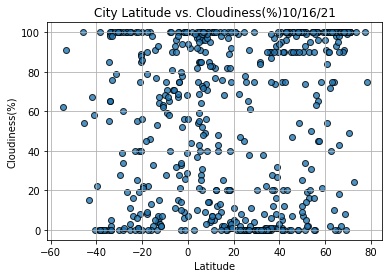

In [33]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,cloudiness, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

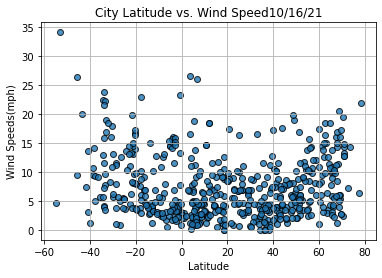

In [34]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,wind_speed, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speeds(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()